<a href="https://colab.research.google.com/github/dalexa10/Python_Data_Science/blob/main/Statistical_Modeling/GLM/generalized_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistical modeling
##Generalized Linear Models

Import packages first

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt 
import math

###Example 1: Psych Data


The data represent the following:
\begin{align}
  Y_i = 
  \begin{cases}
    0 & if \ subject \ i \ is \ healthy \ (30) \\
    1 & if \ subject \ i \ is \ mentally \ ill \ (15) 
  \end{cases}
\end{align}

And the expanatory variables $x_1$, $x_2$, $x_3$, $x_4$, $x_5$ represent scores (1 to 4) on five questions, where higher values are expected to be healthier. 

Let's read the data ... You might need to change the `url_data` variable

In [ ]:
url_data = 'https://raw.githubusercontent.com/dalexa10/Python_4_Data_Science/main/Statistical_Modeling/GLM/psych.txt'
psych = pd.read_csv(url_data, sep=' ')
psych.shape
psych.head(5)

,ill,x1,x2,x3,x4,x5
0,1,2,2,2,2,2
1,1,2,2,2,1,2
2,1,1,1,2,1,1
3,1,2,2,2,1,2
4,1,1,1,2,1,2


In [ ]:
psych.tail(5)

,ill,x1,x2,x3,x4,x5
40,0,2,2,2,1,2
41,0,4,2,2,2,2
42,0,3,3,2,3,3
43,0,2,3,2,2,2
44,0,4,3,1,2,3


Note that the $ill$ column is binary. Hence, a proper linear model depending on the response variables $x_i$ 

Note that `Binomial()` method is used in the `sm.families` object for the `familly` argument

In [ ]:
endog = psych.iloc[:,0] #y: ill
exog = sm.add_constant(psych.iloc[:,1:]) # x1-x5 with the interception

psychfit1 = sm.GLM(endog, exog, family=sm.families.Binomial())
result1 = psychfit1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       39
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.827
Date:                Fri, 17 Feb 2023   Deviance:                       25.653
Time:                        23:41:32   Pearson chi2:                     39.8
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2226      6.332      2.404      0.0

The previous results can be obtained by using the function `logit` from the API `statsmodels.formula.api`

In [ ]:
# In another way
logistic_model = logit('ill ~ x1+x2+x3+x4+x5',psych)
result = logistic_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285038
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    ill   No. Observations:                   45
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.5522
Time:                        00:15:11   Log-Likelihood:                -12.827
converged:                       True   LL-Null:                       -28.643
Covariance Type:            nonrobust   LLR p-value:                 7.023e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2226      6.332      2.404      0.016       2.812      27.633
x1            -0.6757      0.

Bsically the same results are obtained. It can be seen that all effects ( $\hat{\beta}_i$) have the same direction but apparently none appears significant. Is it a possible collinearity?

What if for each individual $y_i$, the total score is used as explanatory variable $x_1$ and apply the same GLM analysis with `Binomial()` method

In [ ]:
# Try using the total score only.
endog = psych.iloc[:,0] #y: ill
np.sum(psych.iloc[:,1:6], axis=1) # calcuate the row sum
exog = sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1))

psychfit2 = sm.GLM(endog, exog, family=sm.families.Binomial())
result2 = psychfit2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.686
Date:                Fri, 17 Feb 2023   Deviance:                       27.373
Time:                        23:58:35   Pearson chi2:                     54.7
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0331      3.145      3.190      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Let's compute the probabilities with both predicted results. When a the total score is used, the probability function looks like this

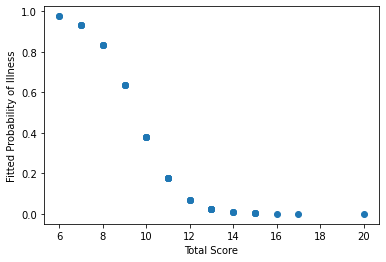

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p(x):   # Calcuate the fitted probabilities
    e = result2.params["const"]+result2.params[0]*x
    return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p, np.sum(psych.iloc[:,1:6], axis=1))) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


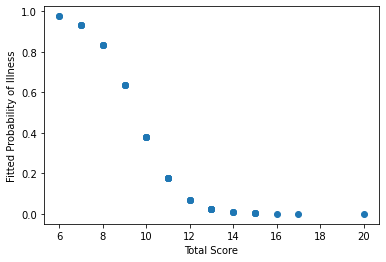

In [ ]:
# Plot fitted probabilities of illness versus the total score:
fitprob = result2.predict(sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1)))

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

In [ ]:
a=psych.iloc[:,1:6].values.tolist()
a[0]

[2, 2, 2, 2, 2]

Now, when $p=4$ (using all the $\beta$ coefficients) and plotting the probability against the answers for Question 1 only

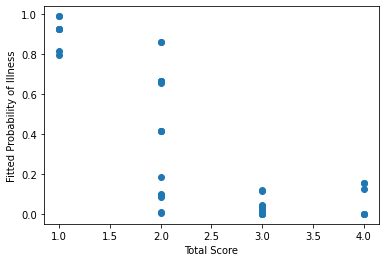

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(psych.iloc[:,1], fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

What about for question 2

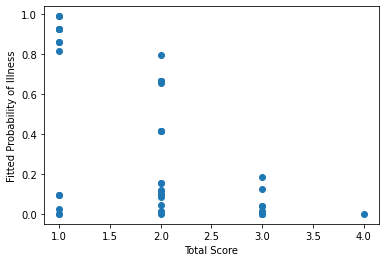

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(psych.iloc[:,2], fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

What about for the total points (adding the results of all questions)?

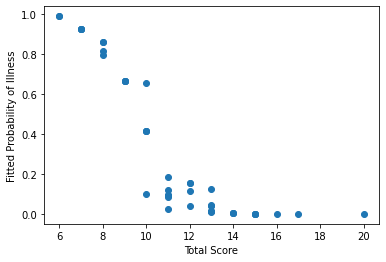

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

##Conclusion 
All plots shown here make sense since the trend indicates that the higher the score, the healthier the individual is. No matter if the probability of a single question score or the total score is considered, when plotting against the probability (computed with the GLM coefficients), the trend is the same. In other words, lower scores indicates the invidual is likely to be ill. \\
Morevoer, recall than summing binary (0/1) observations with the same x (replications) gives a grouped data binomial distribution \\

\begin{aligned}
  Y_i ~ binomial(n_i, \pi(x_i))
\end{aligned}

where $i$ now referes to the ith group (of the $n_i$ binary observations)

###Example 2: Snoring & Heart Disease Data

This is just a simple example to assess the snoring level (0 - 5) as independant variable with a illness (disease/ no disease) cases. Again, this analysis belongs to a binomial distribution case as explained before 

In [ ]:
data = np.array([(24, 1355, 0),(35, 603, 2),(21,192, 4), (30, 224, 5)])
snoreheart = pd.DataFrame(data, columns=['Disease',  'NoDisease',  'Snoring'])
snoreheart

,Disease,NoDisease,Snoring
0,24,1355,0
1,35,603,2
2,21,192,4
3,30,224,5


Note that `endog` is a 2d array for the binomial family `[Disease NoDisease]` and exog is an array-like (single value in this case) for the independent variables $x_i$

In [ ]:
endog = snoreheart.iloc[:,:2] #y: Disease and NoDisease
exog = sm.add_constant(snoreheart.Snoring) # x: Snoring with the interception

snorefit = sm.GLM(endog, exog, family=sm.families.Binomial())
result3 = snorefit.fit()
print(result3.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     ['Disease', 'NoDisease']   No. Observations:                    4
Model:                                  GLM   Df Residuals:                        2
Model Family:                      Binomial   Df Model:                            1
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -11.531
Date:                      Sat, 18 Feb 2023   Deviance:                       2.8089
Time:                              01:07:53   Pearson chi2:                     2.87
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now, let's plot this results. Note how the GLM predicts the trend for any random value for the snoring level range analyzed. 

##Conclusion
From this plot, it can be clearly observed that there is a strong positive correlations between the level of snoring and the probabily of a heart disease.

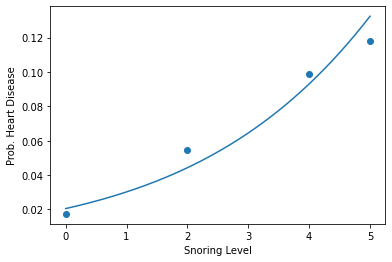

In [ ]:
plt.scatter(snoreheart.Snoring, snoreheart.Disease/(snoreheart.Disease+snoreheart.NoDisease))
plt.xlabel('Snoring Level')
plt.ylabel('Prob. Heart Disease')
x = np.linspace(0, 5, 200)
plt.plot(x, result3.predict(sm.add_constant(x)))
plt.show()